[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['virginamerica', 'what', 'dhepburn', 'said']
Training model....


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[-1.30050909e-03  2.85648112e-03  1.88962114e-03 -1.94734777e-03
  3.46976821e-03  1.56896969e-03  8.30363249e-04  3.73855396e-03
  1.68999215e-03 -2.26923474e-03  3.57099343e-03  4.35459428e-03
  6.78345386e-04 -3.97536583e-04  5.07927209e-04 -6.77227101e-04
  1.12729333e-03 -3.16516962e-03 -2.27553101e-04 -2.63631786e-03
  1.47439574e-03 -2.81523960e-03  2.08121398e-03 -9.13329946e-04
 -3.26528889e-03  1.94405275e-03 -1.28216227e-03  7.43203491e-05
 -8.02737311e-04 -2.42127781e-03  6.45709515e-04  2.44643772e-03
  2.30509648e-03 -5.55921462e-04  9.81597113e-04  1.40261813e-03
 -3.02590500e-03 -3.04839050e-04 -1.87056768e-03  8.86107882e-05
 -9.33439005e-04  1.42529793e-03  2.92281155e-03 -4.27857274e-03
  3.96949286e-03  1.40725309e-03  4.07329033e-04  2.47095362e-03
 -1.92861888e-03  2.78617884e-03  1.62490830e-03  8.34765320e-04
  9.75297648e-04 -2.97161820e-03  5.26394579e-04  9.53978510e-04
  1.16075180e-03 -4.08599572e-03 -4.51567874e-04 -4.87478729e-03
  2.89452192e-03  2.45777

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.64      1.00      0.78      1870
     neutral       0.00      0.00      0.00       614
    positive       0.00      0.00      0.00       444

    accuracy                           0.64      2928
   macro avg       0.21      0.33      0.26      2928
weighted avg       0.41      0.64      0.50      2928

0.6386612021857924


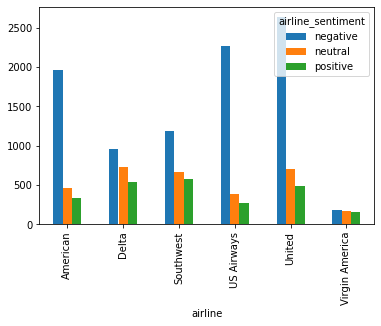

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 26 01:14:40 2020

@author: SERRAJI Mohssine
"""

import numpy as np 
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

import matplotlib.pyplot as plt
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)
'''print(airline_tweets.head())
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])'''

airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = word_tokenize(processed_feature)
    stemmer = nltk.PorterStemmer()
    processed_feature_ws = [stemmer.stem(word.lower()) for word in processed_feature if not word in STOPWORDS]

    processed_features.append(processed_feature_ws)
 
print(processed_features[0])

from gensim.models import Word2Vec
import time

stemmed_tokens = processed_features



# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 1 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
w2v_model = word2vec.Word2Vec(stemmed_tokens,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

print(w2v_model["dhepburn"])
features_final = []
from sklearn.model_selection import train_test_split

for line in processed_features:
  line_avg = (np.mean([w2v_model[word] for word in processed_features[0]], axis=0)).tolist()
  sum_ = line_avg
  features_final.append(line_avg)

X_train, X_test, y_train, y_test = train_test_split(features_final, labels, test_size=0.2, random_state=0)

print(labels.shape)
print(len(features_final))
print(sum_)
print("==================================================================================")
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf_decision_word2vec = DecisionTreeClassifier()
clf_decision_word2vec.fit(X_train, y_train)

predictions = clf_decision_word2vec.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
print("==================================================================================")
print("==================================================================================")
